In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from PIL import Image

import time
from IPython.display import display, clear_output

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#%% Parameters
lmb = 532e-9 # Wavelength in vacuum
k = 2.0*np.pi/lmb # wave vetor
N = 100 # number of pixels
L = 25e-6 # detection field
n_basis = 437 # number of illumination

In [4]:
#%% Load illumination field, E_in
data_path = "/content/drive/MyDrive/Colab Notebooks/Computational Physics/PyTorch/CLASS example/"
os.chdir(data_path)
input_data = np.load("input_data.npy")

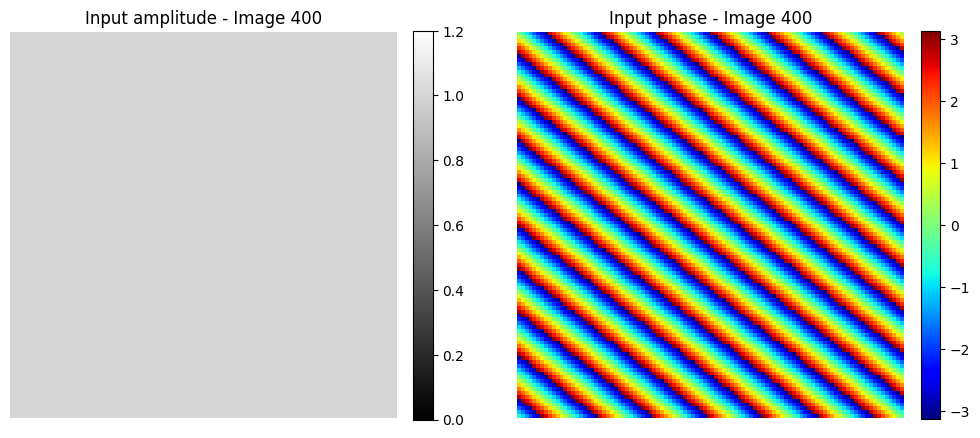

In [5]:
#display the illumination field, E_in
for i in range(n_basis):
    if i % 40 == 0:  # Only display images every 10 iterations
        plt.figure(figsize=(12, 6))  # Specify a larger figure size for clarity

        plt.subplot(1, 2, 1)
        im = plt.imshow(np.abs(input_data[i, :, :]), cmap='gray', vmin=0, vmax=1.2*np.max(np.abs(input_data[i, :, :])))
        plt.title(f'Input amplitude - Image {i}')
        plt.gca().set_axis_off()
        plt.colorbar(im, orientation='vertical', fraction=0.046, pad=0.04)  # Add a color bar to the amplitude plot

        plt.subplot(1, 2, 2)
        im_phase = plt.imshow(np.angle(input_data[i, :, :]), cmap='jet')
        plt.title(f'Input phase - Image {i}')
        plt.gca().set_axis_off()
        plt.colorbar(im_phase, orientation='vertical', fraction=0.046, pad=0.04)  # Add a color bar to the phase plot

        plt.show()
        time.sleep(0.5)  # Pause for 0.5 seconds between images
        clear_output(wait=True)  # Clear the output to prepare for the next image

In [6]:
# Upload object function and output aberration
Object = np.array(Image.open("USAF1000.png"))
Object = Object[(np.size(Object,1)-N)//2:(np.size(Object,1)+N)//2,(np.size(Object,1)-N)//2:(np.size(Object,1)+N)//2]

output_aberration_phase = np.loadtxt("output_aberration_phase.txt")
output_aberration_amp = np.loadtxt("output_aberration_amp.txt")
output_aberration = output_aberration_amp * np.exp(1.0j*output_aberration_phase)

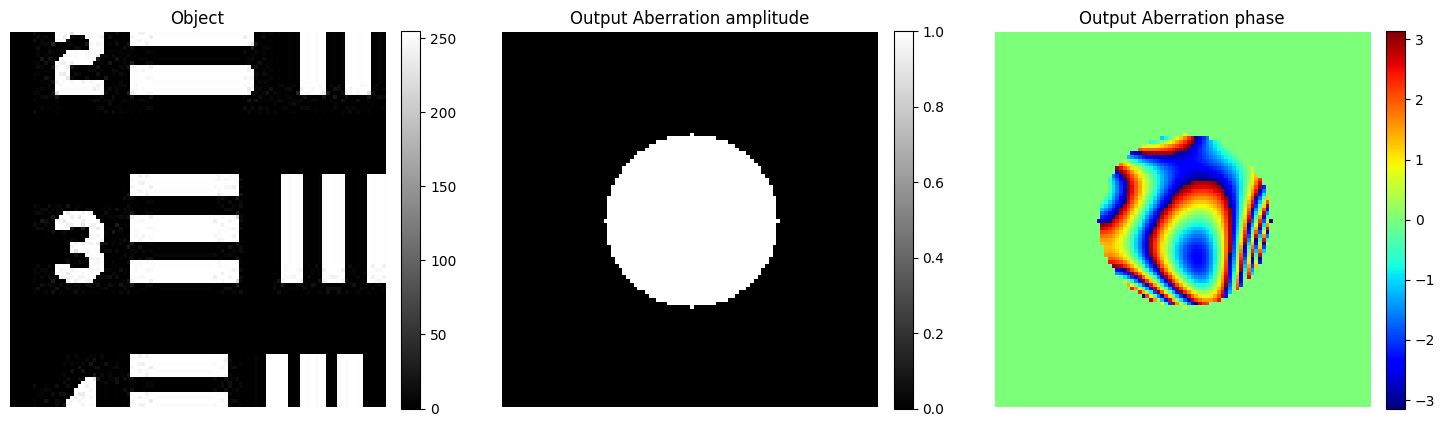

In [7]:
# Display the object function and output aberration

plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

# Plot for the Object
plt.subplot(1, 3, 1)
im_object = plt.imshow(Object, cmap='gray')
plt.title('Object')
plt.gca().set_axis_off()
plt.colorbar(im_object, orientation='vertical', fraction=0.046, pad=0.04)  # Adding a color bar

# Plot for Output Aberration Amplitude
plt.subplot(1, 3, 2)
im_aberration_amp = plt.imshow(np.abs(output_aberration), cmap='gray')
plt.title('Output Aberration amplitude')
plt.gca().set_axis_off()
plt.colorbar(im_aberration_amp, orientation='vertical', fraction=0.046, pad=0.04)  # Adding a color bar

# Plot for Output Aberration Phase
plt.subplot(1, 3, 3)
im_aberration_phase = plt.imshow(np.angle(output_aberration), cmap='jet')
plt.title('Output Aberration phase')
plt.gca().set_axis_off()
plt.colorbar(im_aberration_phase, orientation='vertical', fraction=0.046, pad=0.04)  # Adding a color bar

plt.show()


In [8]:
#%% FFT functions
def _FT(x):
    return np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(x)))

def _iFT(x):
    return np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(x)))

In [9]:
#%% Data Generation using a forward model
output_list = []
for i in range(n_basis):
  E = input_data[i]
  E = E * Object
  fE = _FT(E)
  fE = fE * output_aberration
  E = _iFT(fE)
  output_list.append(E)

In [10]:
#%% Save Data - Google Drive
output_arr = np.array(output_list)
np.save('output_data.npy',output_arr)

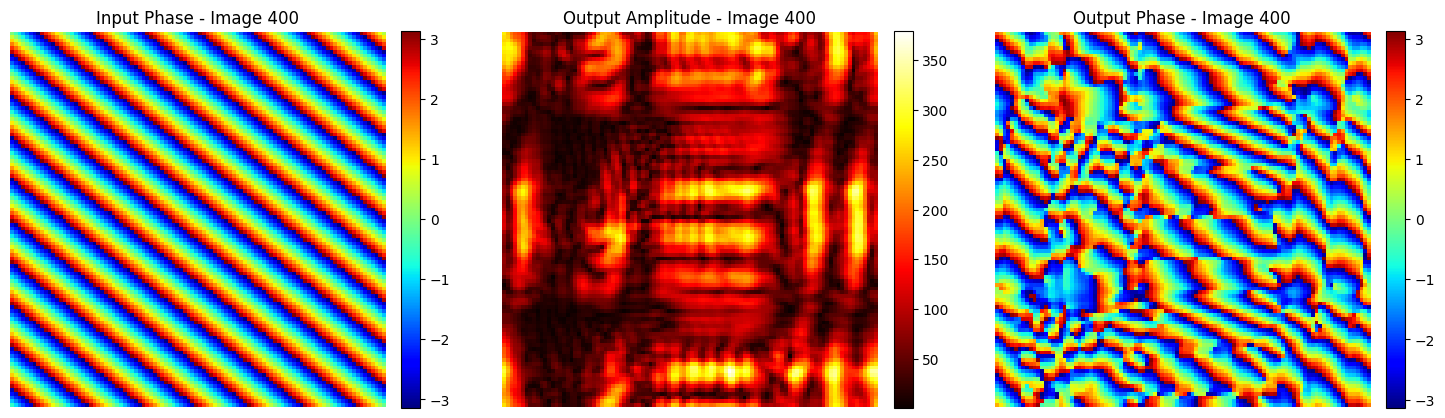

Displayed image 400


In [11]:
#%% Data Visualization
for i in range(n_basis):
    if i % 40 == 0:  # Only process every 40th image
        plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

        # Plot for Input Phase
        plt.subplot(1, 3, 1)
        im_input_phase = plt.imshow(np.angle(input_data[i]), cmap='jet')
        plt.title(f'Input Phase - Image {i}')
        plt.gca().set_axis_off()
        plt.colorbar(im_input_phase, orientation='vertical', fraction=0.046, pad=0.04)

        # Plot for Output Amplitude
        plt.subplot(1, 3, 2)
        im_output_amp = plt.imshow(np.abs(output_arr[i]), cmap='hot')
        plt.title(f'Output Amplitude - Image {i}')
        plt.gca().set_axis_off()
        plt.colorbar(im_output_amp, orientation='vertical', fraction=0.046, pad=0.04)

        # Plot for Output Phase
        plt.subplot(1, 3, 3)
        im_output_phase = plt.imshow(np.angle(output_arr[i]), cmap='jet')
        plt.title(f'Output Phase - Image {i}')
        plt.gca().set_axis_off()
        plt.colorbar(im_output_phase, orientation='vertical', fraction=0.046, pad=0.04)

        plt.show()
        print(f"Displayed image {i}")  # Print statement to confirm each display
        time.sleep(0.5)  # Pause for 0.5 seconds between images
        clear_output(wait=True)  # Clear the output to prepare for the next image
